<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Sep30/Ejercicio_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
def tetha_prop(tet_in1,tet_in2, sig1, sig2):
  tet_p=np.zeros(2)
  tet_p[0]= np.random.normal(tet_in1,sig1)
  tet_p[1]= np.random.normal(tet_in2,sig2)
  return tet_p

In [206]:
x=data[0]
y=data[1]

In [222]:
X_norm=(x-np.mean(x))/np.std(x)

In [170]:
def model(x,tetha):
  f=tetha[0]+tetha[1]*x**1
  return f

def likelihood(y,x,tetha):
  f=model(x,tetha)
  R=0
  for i in range(len(np.array(y))):
    R+=(y[i]-f[i])**2
  return -(0.5)*R

def prior(Tet_min0,Tet_min1,Tet_max0, Tet_max1,tet_prop):
  if Tet_max0 > tet_prop[0]  > Tet_min0 and Tet_max1 > tet_prop[1]  > Tet_min1:
    LPrior=0
  else:
    LPrior=-math.inf
  return LPrior

In [171]:
likelihood(y,x,[31,.1])

-629179.5647000001

In [172]:
def Post(prior, likelihood):
  Post = likelihood + prior
  return Post

In [203]:
def Eval(N,y,x,tet_ini,sig1,sig2,T_min0, T_max0, T_min1, T_max1):
  Tet_accept=tet_ini
  Tet_acc = np.array(Tet_accept)
  for i in range(N):
    Prop = tetha_prop(tet_ini[0],tet_ini[1],sig1,sig2)
    if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop)) > Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)):
      Tet_acc = np.vstack((Tet_acc,Prop))
      tet_ini= Prop
    else:
      ptest=np.random.uniform(0,1)
      if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop))-Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)) > np.log(ptest):
        Tet_acc= np.vstack((Tet_acc,Prop))
        tet_ini= Prop
  return Tet_acc

In [204]:
tetha_prop(tet_ini[0],tet_ini[1],sig1,sig2)

array([0.06102495, 0.00053561])

In [205]:
data = np.loadtxt("olympic100m_men.txt",delimiter=',').T

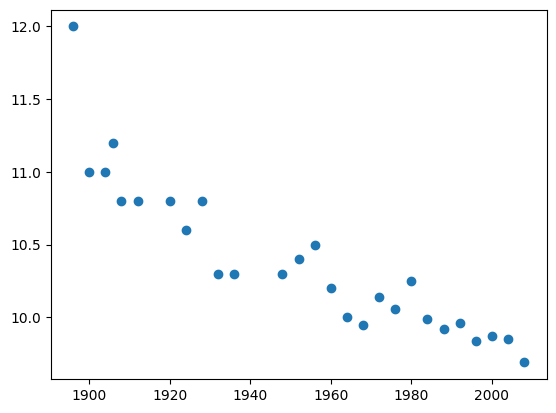

In [207]:
plt.scatter(x,y)

In [225]:
N=10000


In [229]:
tet_ini=np.array([0,0])
sig1=0.1
sig2=0.3
T_min0, T_max0= -40,40
T_min1, T_max1= -40,40

In [230]:
Tethas = Eval(N,y,X_norm,tet_ini,sig1,sig2,T_min0, T_max0, T_min1, T_max1)

In [231]:
Graf = Tethas.T

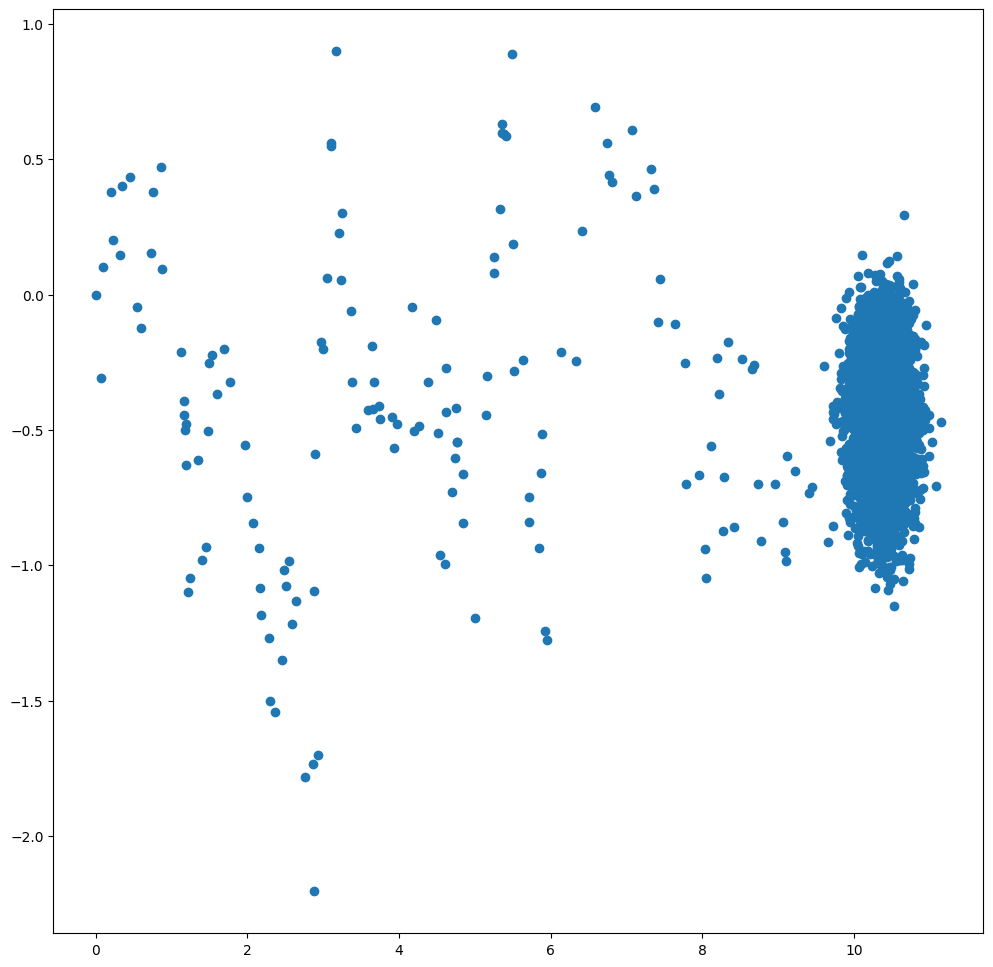

In [232]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.scatter(Graf[0],Graf[1])

<ipython-input-238-54a849aee8e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Graf[0], bins=100)


(9.0, 12.0)

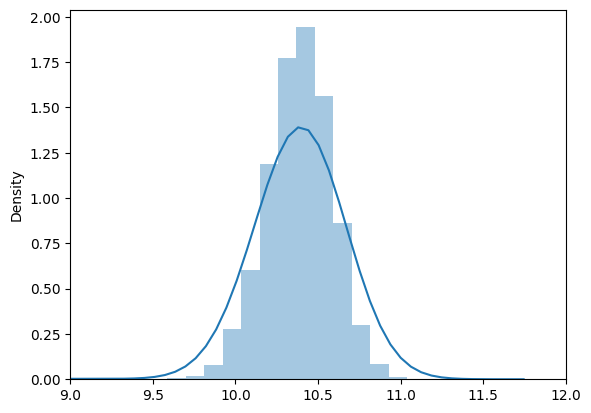

In [238]:
#Gráficos de W0
sns.distplot(Graf[0], bins=100)
plt.xlim(9, 12)

<ipython-input-240-ae49fa064c5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Graf[1],bins=100)


(-1.25, 0.5)

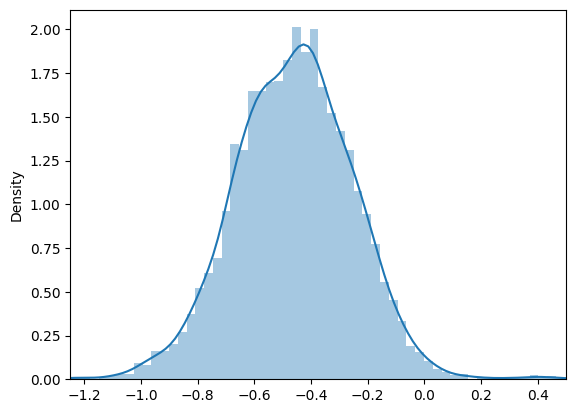

In [240]:
#Gráfico de W1
sns.distplot(Graf[1],bins=100)
plt.xlim(-1.25, 0.5)